In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import calendar

# Walt Disney World Wait Times - Explainer Notebook 

## Motivation 

**The dataset:**
Our data consists of 7 datasets that each contain the waiting time for an attraction at a certain timestamp. These datasets contains information mainly in the period 2013-2019. Some attractions have only got data for a smaller period of time as they opened in the later years. 

The columns in these datasets are: date, datetime, SPOSTMIN, SACTMIN. Date and datetime are the date and the time of the observation. SPOSTMIN is the estimated wait time and SACTMIN is the actual wait time. SACTMIN is not very useful as the number of observations is very small compared to the estimated wait time.

In relation to these attraction-datasets we also have a metadata set with information about the parks in Walt Disney World. This set contains information from 1st of January 2012 and is updated regularly with each passing month. Metadata includes, but is not limited to: seasons, opening hours, temperature, parades information. 

We have also created a ticket price dataset after doing some research. This dataset have information about the price of a ticket to parks inside Walt Disney World from 2012 to 2019. As the ticket system was changed in 2016 a tier column is also available.

Last we have a dataset with precipitation in the period 1st of January 2012 to 31st of December 2017. This data set contains daily measurement of the precipitation collected by a weather station in Orlando, Florida.


**Why we chose this/these datasets:**

We chose these datasets as we see potential connections between how much time is spent waiting in line for attraction and the weather or the price tag of the entrance fee. We wanted to explore if any correlation could be found between these factors as we hypothesized that waiting time might diminish as parades started or the weather got worse. By having several attractions we also allow the user to look at attractions that might interest them the most. With ticket prices we also allowed users to see the development in price and how much they can expect to pay based on earlier years.

**The goal for the end user's experience:**

Our goal was to create a website where users who wants to go Disney World can come and experience historical data and get a sense of what period of time, fits their requirements . We wanted to allow users to browse through previous data which could then decide on when they should visit Disney World. By creating monthly, weekly and daily wait time plots we wanted to allow the user to go from a wide perspective down to a more narrow scope, where one can decide on the exact date they might want to visit, based on previous years’ data. With precipitation and temperature the user would also be able to see what kind of weather to expect and if it had any influence on the waiting time. All this information would be useful as many probably only visit Disney World once or twice and it should therefore be as fun as possible.

## Basic stats

First we load all our datasets into Python. 
Each attraction has its own dataset and we will combine these into a single dataframe called frame.

In [2]:
#Load attractions files into Python
rock = pd.read_csv("rock_n_rollercoaster.csv")
rock["attraction"] = "Rock N Rollercoaster"

In [3]:
dwarf = pd.read_csv("7_dwarfs_train.csv")
dwarf["attraction"] = "7 Dwarfs Train"

In [4]:
alien = pd.read_csv("alien_saucers.csv")
alien["attraction"] = "Alien Saucers"

In [5]:
pirates = pd.read_csv("pirates_of_caribbean.csv")
pirates["attraction"] = "Pirates of Caribbean"

In [6]:
toy_story = pd.read_csv("toy_story_mania.csv")
toy_story["attraction"] = "Toy Story Mania"

In [7]:
splash_mountain = pd.read_csv("splash_mountain.csv")
splash_mountain["attraction"] = "Splash Mountain"

In [8]:
slinky_dog = pd.read_csv("slinky_dog.csv")
slinky_dog["attraction"] = "Slinky Dog"

In [9]:
#Combine wait times for each park into one dataframe
frame = pd.concat([rock, alien, slinky_dog, toy_story, dwarf,pirates, splash_mountain])

Furthermore we have a metadata file containing Walt Disney World metadata and a rain file with the precipitation

In [10]:
#Load metadata file containing metadata about parks
metadata = pd.read_csv("metadata2.csv")

In [11]:
#Load rain file containing rainfall data
rain = pd.read_csv('Rain.csv')

Links to where datasets can be found:
* Disney World Data: https://touringplans.com/walt-disney-world/crowd-calendar#DataSets
* Rain: https://climatecenter.fsu.edu/climate-data-access-tools/downloadable-data
(The weather station used is: Orlando Intl AP)
* Ticket prices: http://allears.net/walt-disney-world/wdw-planning/wdw-ticket-increase-guide/

### Exploratory data analysis 

First we have chosen to create box plots for attraction wait times.
This allows us to see if there is any outliers in the data.

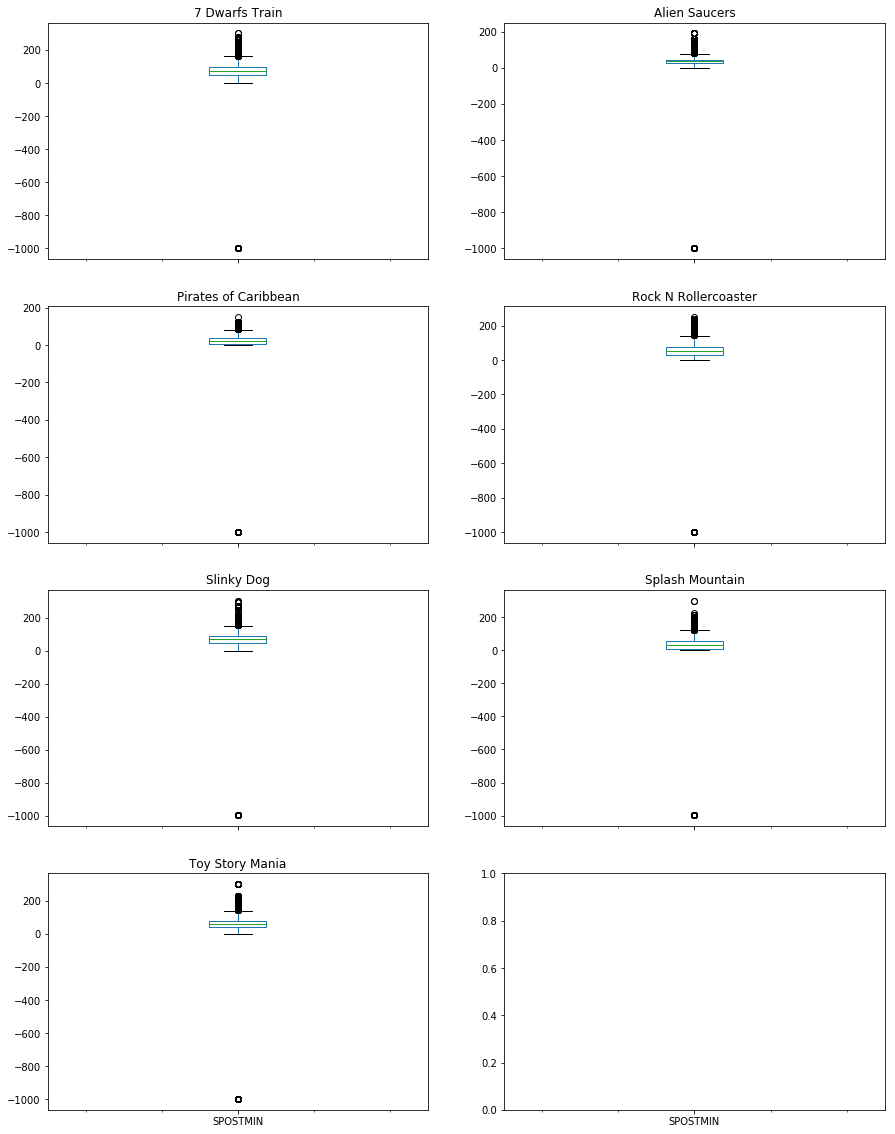

In [12]:
#Create boxplots for the wait time to find outliers
fig, axes = plt.subplots(4,2, figsize=(15,20), sharex=True)
for (attraction, group), ax in zip(frame.groupby(frame['attraction']), axes.flatten()):
    group.plot(x='date', y='SPOSTMIN', kind='box', ax=ax, title=attraction, legend=None)

The box plots have revealed that all attractions have outliers the heavly influence the datasets.
After researching these numbers we discovered that if an attraction has been closed it's wait time will be -999.
Therefor we want to exlude these observations. 

In [13]:
#Remove negative wait times as they indicates attraction closure
frame = frame[frame['SPOSTMIN'] > -1]

After cleaning the dataset, we create new boxplots, to see the distribution of our data.

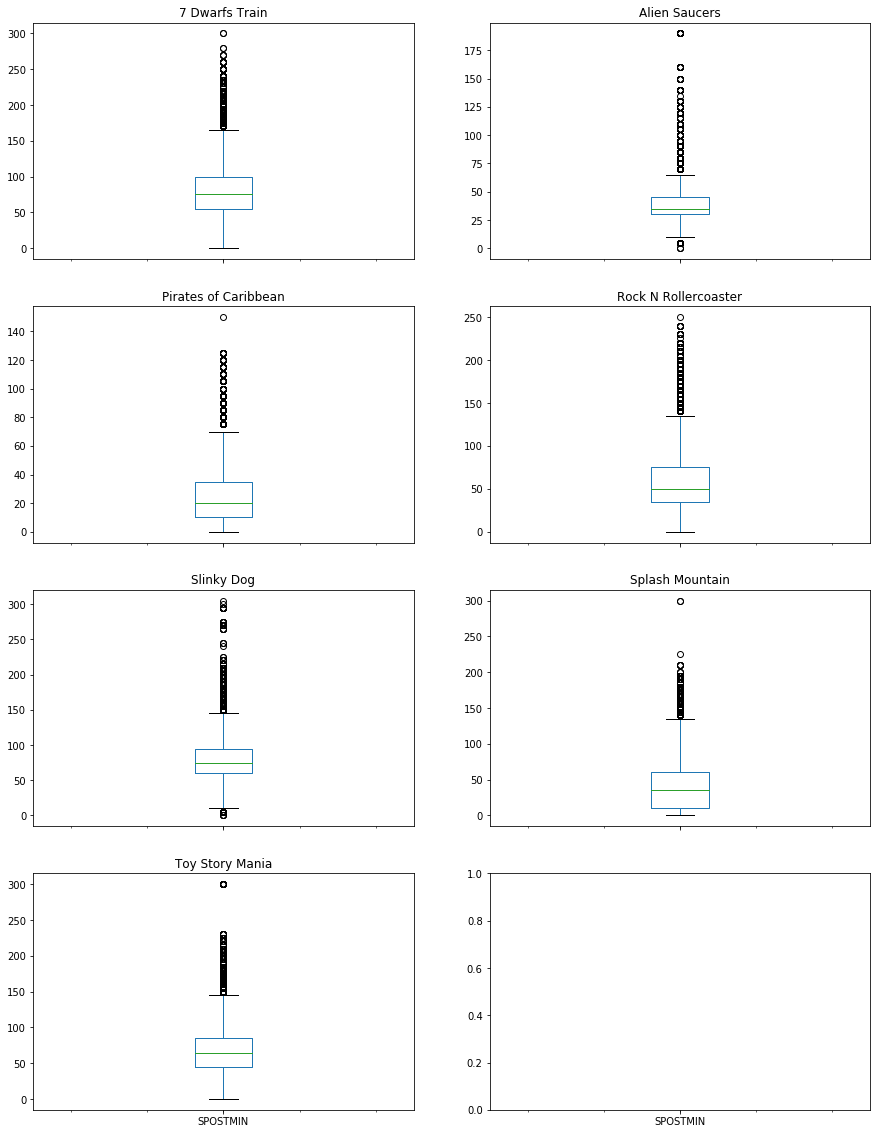

In [14]:
fig, axes = plt.subplots(4,2, figsize=(15,20), sharex=True)
for (attraction, group), ax in zip(frame.groupby(frame['attraction']), axes.flatten()):
    group.plot(x='date', y='SPOSTMIN', kind='box', ax=ax, title=attraction, legend=None)

Next we wish to see if there is any changes in the avarage wait time of the years. First we make histograms for each attraction over the years. To start we have to convert our date columns to a datetime value. And from this we can create a year column which is what we will need.

In [15]:
#Convert date values to datetime
frame['date'] = pd.to_datetime(frame['date'])
frame['datetime'] = pd.to_datetime(frame['datetime'])
frame['year'] = frame['date'].dt.year

In [16]:
hist = frame.groupby(['attraction', 'year']).mean()
hist = hist.reset_index()[['attraction', 'year', 'SPOSTMIN']]

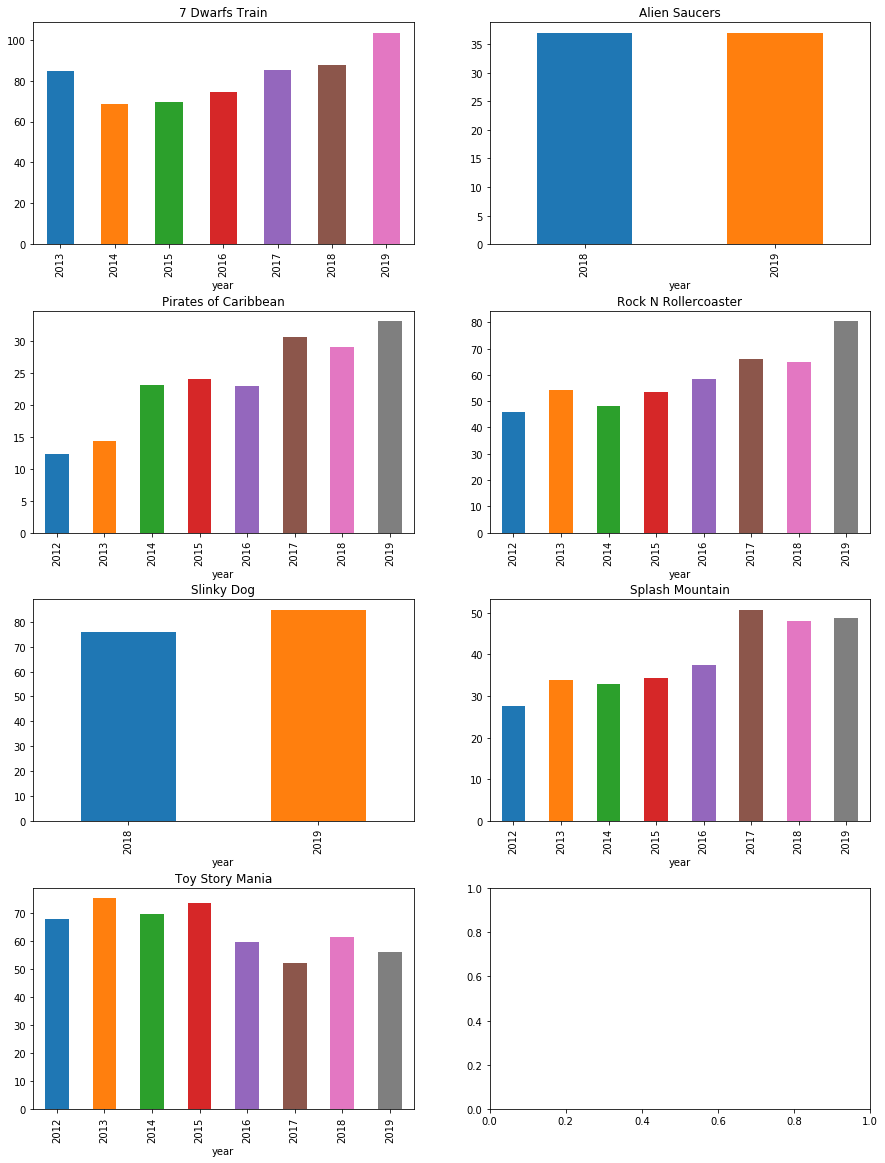

In [17]:
#Create histograms for each attraction
fig, axes = plt.subplots(4,2, figsize=(15,20), sharex=False)
fig.subplots_adjust(hspace=0.3)
for (attraction, group), ax in zip(hist.groupby(hist['attraction']), axes.flatten()):
    group.plot(x='year', y='SPOSTMIN', kind='bar', ax=ax, title=attraction, legend=None)

As we can see most attration's wait time is increasing over the years. 
It is hard to make any conclusions on Slinky Dog and Alien Saucers as they have only been opened for two years. 
Now we need to look into what could have an effect on these observations, a fun comparison could be to look the at ticket price for the entrance of the park.

In [18]:
ticket_price = pd.read_csv("Ticket Prices.csv")

Disney World changed their park tickets in 2016 from having only a regular ticket price to have both a peak, regular and value ticket price. These ticket tiers changed again in 2019 adding a holiday and low ticket price. To make a quick overview of the ticket prices we look only at the regular price as this tier has been there from 2012 to 2019. Prior to 2016 there were also a seperate price for each park - therefor we will take the mean of both parks for this graph. 

In [19]:
#Filter to only look at Regular tier prices
ticket_price = ticket_price[ticket_price['Tier'] == 'Regular']

In [20]:
#Group by year and find mean value. This is needed because of years prior to 2016
yearly_price = ticket_price.groupby(['Year']).mean()
yearly_price = yearly_price.reset_index()[['Year', '\nOne Day Price $']]

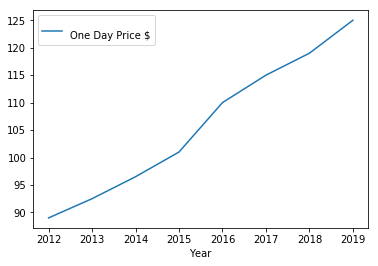

In [21]:
lines = yearly_price.plot.line(x='Year', y='\nOne Day Price $')

As we can see here the ticket prices are rising fast. This is not a contributing factor then to the rising wait time.

The average wait time from the bar plots could though still be misleading, if some months (and therefor years) has less observations than others. 
To explore this hypothesis we will now look at how many observations we have for each year.

In [22]:
hist2 = frame.groupby(['attraction', 'year']).count()
hist2 = hist2.reset_index()[['attraction', 'year', 'SPOSTMIN']]

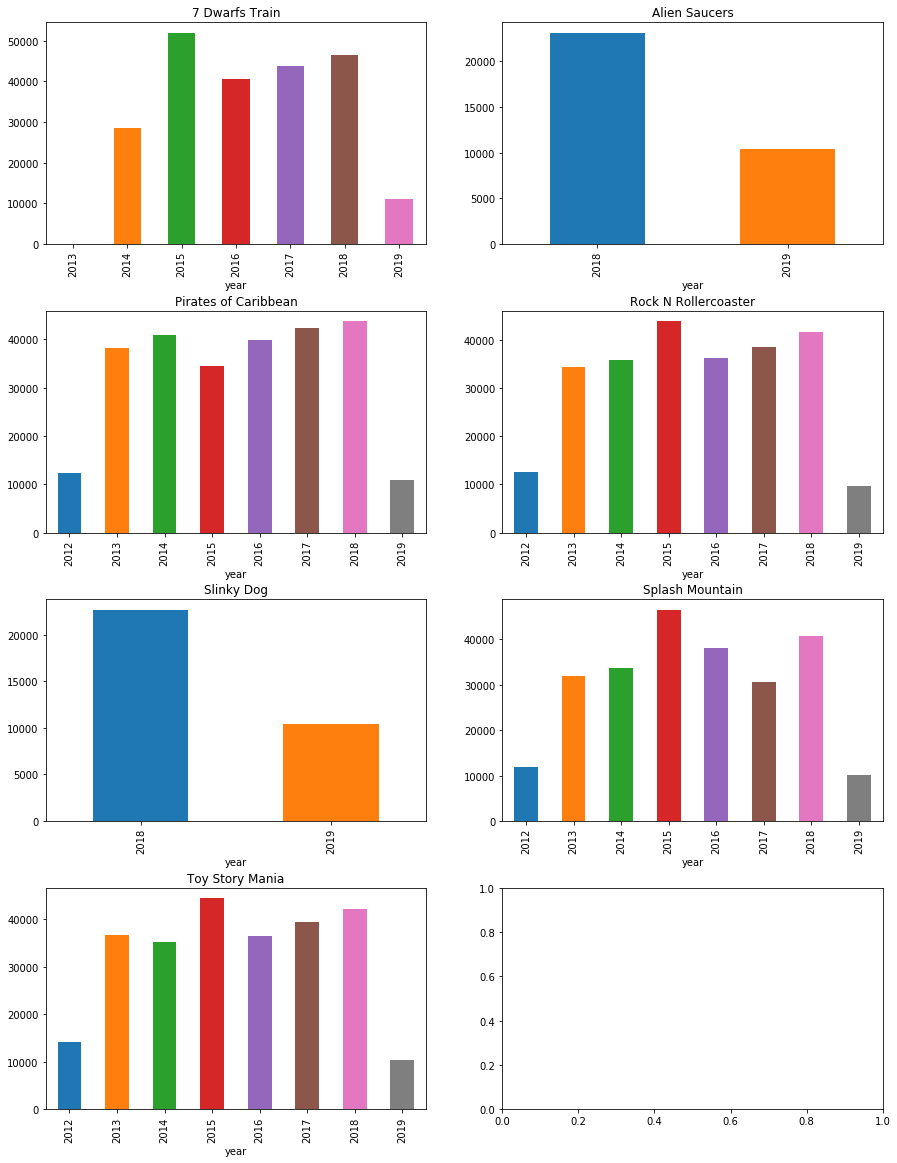

In [23]:
#Create histograms for each attraction
fig, axes = plt.subplots(4,2, figsize=(15,20), sharex=False)
fig.subplots_adjust(hspace=0.3)
for (attraction, group), ax in zip(hist2.groupby(hist2['attraction']), axes.flatten()):
    group.plot(x='year', y='SPOSTMIN', kind='bar', ax=ax, title=attraction, legend=None)

We can now see that the years 2012 and 2019 has very few observations in comparision to the others.
For 2019 this can be explained very easily as the year is still ongoing.
As for 2012 we can see that this is the earliest year which might suggest that they started the data collection here and therefore the observations is sparse.

From this conclusion we have decided to exlude the data from 2012 and 2019 as they give a misleading picture compared to the rest of data set.

In [24]:
#Remove 2012 and 2019 observations from the dataset
frame = frame[frame['date'].dt.year != 2012]
frame = frame[frame['date'].dt.year != 2019]

Next we need to clean our metadata file so it only contains data that we want to compare to the waiting times.
Factors that might have an impact on the waiting time could be parades as many park guests line up to see the parades, and therefor do not use the attractions. Another factor could be which season it is, and if it is a holiday season, as more people have free to go to Disney World. At last something that could affect the waiting time could be the weather. People might be less willing to wait in line deepending whether its hot or cold.
Based on this we have cleaned our meta data set:


In [25]:
#Reset index of metadata to only contain columns of value.
metadata = metadata.reset_index()[['DATE','WDW_TICKET_SEASON','WEEKOFYEAR','SEASON','HOLIDAYM','HOLIDAYN',
                                 'HOLIDAY','WDWSEASON','WDWMAXTEMP','WDWMINTEMP','WDWMEANTEMP',
                                 'SUNSET_WDW','MKOPEN','MKCLOSE','MKHOURS','HSOPEN','HSCLOSE',
                                 'HSHOURS','MKPRDDAY','MKPRDDT1','MKPRDDT2','MKPRDDN','MKPRDNGT',
                                 'MKPRDNT1','MKPRDNT2','MKPRDNN','MKFIREWK','MKFIRET1','MKFIRET2',
                                 'MKFIREN','HSPRDDAY','HSPRDDT1','HSPRDDN','HSFIREWK','HSFIRET1',
                                 'HSFIRET2','HSFIREN','HSSHWNGT','HSSHWNT1','HSSHWNT2','HSSHWNN']]

In [26]:
#We also clean away any data from 2012 & 2019.
#Cast DATE column to datetime
metadata['DATE'] = pd.to_datetime(metadata['DATE'])
metadata = metadata[metadata['DATE'].dt.year != 2012]
metadata = metadata[metadata['DATE'].dt.year != 2019]

Based on the rising ticket prices as well as the increase in wait time over the years we can conclude that more and more people visit Disney World each year (despite the prices). We can also see that Disney World are adding new attractions, which should spread people more, but this is not the case. We can therefor conclude that there is a need to make further analysis to see what actually affects the wait time for each attraction. With more and more visitors to Disney it might also be useful to have a place to go to find out what time of year is the best for visiting the park. 

## Data Analysis

In this section dataset for the Observable Notebook is created and prepared.
Datasets created are:
* daily_wait: Wait time for any given date in 2018
* weekly_wait: Average wait time on weekdays pr. month pr. year
* monthly_wait: Average wait time pr. month pr. year
* weather: Average temperature pr. month pr. year
* data: Ticket data

In [27]:
#Create a function that can round a timestamp to nearest half hour
#Function
def round_time(time, round_to):
    """roundTo is the number of minutes to round to"""
    rounded = time + datetime.timedelta(minutes=round_to/2.)
    rounded -= datetime.timedelta(minutes=rounded.minute % round_to,
                                  seconds=rounded.second,
                                  microseconds=rounded.microsecond)
    return rounded

In [28]:
#Create copy of frame dataframe for wait time on any given date in 2018.
daily_wait = frame

In [29]:
#Convert extract time from datetime and round to nearest half hour
daily_wait['time'] = daily_wait['datetime'].apply(lambda x: round_time(x, 30))
daily_wait['time'] = pd.Series([val.time() for val in daily_wait['time']])

In [30]:
#Sort to only contain 2018, then find mean for each date
daily_wait = daily_wait[daily_wait['date'].dt.year == 2018]
daily_to_file = daily_wait.groupby(['attraction', 'date', 'time']).mean()
#Reset index to only contain attraction, date, time and SPOSTMIN. Then round to nearest whole number.
daily_to_file = daily_to_file.reset_index()[["attraction", "date","time", "SPOSTMIN"]]
daily_to_file = daily_to_file.round(0)
daily_to_file.to_csv("daily_wait.csv", sep=",", index=False)

In [31]:
#Create copy of frame dataframe for wait time pr. weekday for each month
weekly_wait = frame

In [32]:
#Create weekday, month and year from date field
weekly_wait['weekday'] = weekly_wait['date'].dt.day_name()
weekly_wait['month'] = weekly_wait['date'].dt.month_name()
#weekly_wait['year'] = weekly_wait['date'].dt.year

In [33]:
weekTMP = weekly_wait.groupby(['weekday', 'month','year']).mean()
weekTMP['attraction'] = 'All'
week_all = weekTMP.reset_index()[['attraction', 'year', 'weekday', 'SPOSTMIN']]

In [34]:
#Group by columns needed and find mean of wait time.
weekly_group = weekly_wait.groupby(['attraction','weekday', 'month','year']).mean()
#Reset index to contain only wanted columns and round to nearest whole number.
weekly_group = weekly_group.reset_index()[["attraction","year","month", 'weekday', "SPOSTMIN"]]
weekly_to_file = pd.concat([weekly_group, week_all])
weekly_to_file = weekly_to_file.round(0)
#Sort dataframe by weekday to maintain proper weekday order.
weekly_to_file['weekday'] = pd.Categorical(weekly_to_file['weekday'], ["Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
weekly_to_file = weekly_to_file.sort_values("weekday")
weekly_to_file.to_csv("Weekly_wait.csv", sep=",", index=False)

C:\Users\Rasmus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [35]:
#Create copy of frame dataframe for wait time pr. month
monthly_wait = frame

In [36]:
#Create weekday, month and year from date field
monthly_wait['time'] = pd.Series([val.time() for val in monthly_wait['datetime']])
monthly_wait['month'] = monthly_wait['date'].dt.month_name()
#monthly_wait['year'] = monthly_wait['date'].dt.year

In [37]:
#Create a temporary dataframe for a cumulative waiting for all attractions.
tmp = monthly_wait.groupby(['month','year']).mean()
tmp["attraction"] = "All"
wait_all = tmp.reset_index()[["attraction","year","month", "SPOSTMIN"]]

In [38]:
#Group and create the mean of the wait time
monthly_wait = monthly_wait.groupby(['attraction', 'month','year']).mean()
monthly_group = monthly_wait.reset_index()[["attraction","year","month", "SPOSTMIN"]]
monthly_wait_to_file = pd.concat([monthly_group, wait_all])
monthly_wait_to_file = monthly_wait_to_file.round(0)

In [39]:
#Create a categori to sort the dataframe after months of the year
monthly_wait_to_file['month'] = pd.Categorical(monthly_wait_to_file['month'], ["January", "February","March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
monthly_wait_to_file = monthly_wait_to_file.sort_values("month")

In [40]:
#Write csv file with average wait time
monthly_wait_to_file.to_csv("Monthly_avg_wait_time.csv", sep=",", index=False)

In [41]:
#Write new metadata csv file with selected columns
metadata.to_csv("DaysMetadata.csv", sep=",", index=False)

In [42]:
#Create copy of original metadata frame for average temperature pr. month
weather = metadata

In [43]:
#Remove temperatures that exceeds 120 fahrenheit and remove them
weather = weather.drop(weather[weather['WDWMEANTEMP'] > 120].index)

In [44]:
#Create month and year columns. Then group by those and find the mean temperature for each month.
weather['MONTH'] = weather['DATE'].dt.month_name()
weather['YEAR'] = weather['DATE'].dt.year
weather_group = weather.groupby(['MONTH','YEAR']).mean()
weather_to_file = weather_group.reset_index()[['MONTH','YEAR', 'WDWMEANTEMP']]

In [45]:
#As WDWMEANTEMP is in Fahrenheit we convert it Celcius and round of to nearest whole number.
weather_to_file['Celcius'] = weather_to_file['WDWMEANTEMP'].apply(lambda x: (x-32)*5/9)
weather_to_file = weather_to_file.round(0)

In [46]:
weather_to_file.to_csv("MonthlyTemp.csv", sep=",", index=False)

In [47]:
#Begin trimming the rain dataset
#Get month name from month int
rain['MONTH'] = rain['MONTH'].apply(lambda x: calendar.month_name[x])
#Remove negative values as they indicate reading errors as it is not possible to rain negative.
rain = rain.drop(rain[rain['precipitation'] < 0].index)

In [48]:
#Group by year and month and find the mean value of rainfall
rain = rain.groupby(['YEAR', 'MONTH']).mean()
rain = rain.reset_index()[['YEAR','MONTH', 'precipitation']]
#Convert rainfall from inches to mm
rain['precipitation'] = rain['precipitation'].apply(lambda x: x*25,4)
rain = rain.round(1)

In [49]:
rain.to_csv('Rainfall.csv', sep=',', index=False)

Prepare data for the calendar

In [50]:
#Create copy of metadata frame
df = metadata

In [51]:
#Create new frame with selected columns
data1=pd.concat([df['DATE'],df['WDW_TICKET_SEASON'],df['HOLIDAYN'],df['HOLIDAY']],axis=1,ignore_index=True)
data1.columns = ['Date','Ticket_season','HOLIDAYN','HOLIDAY']
data1=data1.dropna(subset=['Ticket_season'])
#Fill NA with No holiday
data1=data1.fillna("No holiday")

In [52]:
#Create frame for each ticket season
Midl_frame=data1[data1['Ticket_season']=='value']
Midl_frame['Ticket_season'] = 1

Midl1_frame=data1[data1['Ticket_season']=='regular']
Midl1_frame['Ticket_season'] = 2

Midl2_frame=data1[data1['Ticket_season']=='peak']
Midl2_frame['Ticket_season'] = 3

C:\Users\Rasmus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rasmus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rasmus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [53]:
#Combine ticket season dataframes and sort.
data=pd.concat([Midl_frame,Midl1_frame,Midl2_frame],ignore_index = True)

data=data.sort_values(by = ['Date'])
data.columns = ['date','value','Holiday','Holiday_occur']

In [54]:
#Create value for each ticket season in DKK from USD
data1=data[data['value']==1]
data1['ticket_price']=101*6.647

data2=data[data['value']==2]
data2['ticket_price']=106*6.647

data3=data[data['value']==3]
data3['ticket_price']=119*6.647

C:\Users\Rasmus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rasmus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rasmus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [55]:
#Combine all data and save to csv
data=pd.concat([data1,data2,data3],ignore_index = True)
data['date_range']=0
data=data.sort_values(by=['date'])
data.to_csv('Data_ticket.csv',index=False)

### Analysis

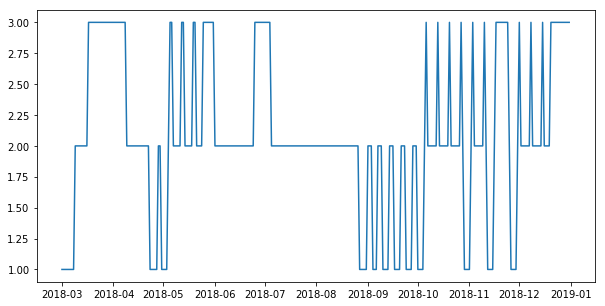

In [56]:
plt.figure(figsize=(10,5))
plt.plot(data['date'][365*2:365*3], data['value'][365*2:365*3])
plt.show()

Ticket prices and their variation through the year was analyzed. This is seen in the below line chart, where the period 01-03-2018 to 01-03-2019 is shown on the X-axis and ticket prices divided into 3 groups: 1 = C heap, 2 = Medium, 3 = expensive on the Y-axis.

Ticket prices varies significantly from day to day, therefore we must treat each observation individually when looking at ticket price.

In [57]:
df_wait = pd.read_csv('https://gist.githubusercontent.com/TheGundel/40d16e9763db19f9d22fbcfa73b567c1/raw/02cc72cdfdc716c18b9e6932db308e8c499e0919/daily_wait.csv')
avg_wait=df_wait.groupby(['date']).mean()
avg_wait=avg_wait.reset_index()
select2018=df[df.DATE.dt.year==2018]

In [58]:
H1=select2018[select2018['HOLIDAYM']>0]
H1['HOLIDAY']=1
H2=select2018[select2018['HOLIDAYM']==0]
Holiday_frame=pd.concat([H1,H2],ignore_index = True)

C:\Users\Rasmus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
Holiday_frame=Holiday_frame.sort_values(['DATE'])

sel_holiday=Holiday_frame['HOLIDAY']

sel_holiday=sel_holiday.reset_index(drop = True)
avg_wait['Holiday'] = sel_holiday

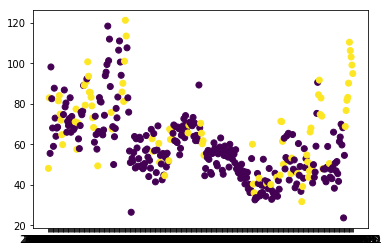

In [60]:
T1 = avg_wait[avg_wait['Holiday']==1]
T2 = avg_wait[avg_wait['Holiday']==0]
plt.scatter(avg_wait['date'],avg_wait['SPOSTMIN'],c=avg_wait['Holiday'])
plt.show()

Furthermore the correlation between holidays and waiting time was analyzed. The attribute HOLIDAYM and HOLIDAYN was used. The below scatterplot shows wait time on holiday related days (yellow) and normal days (purple)

In [61]:
avg_wait[avg_wait['Holiday']==1].mean()/avg_wait[avg_wait['Holiday']==0].mean()

SPOSTMIN    1.180395
Holiday          inf
dtype: float64

The yellow observations tend to be located higher than the purple and further analysis shows, that there is an average wait time of 69 minutes on days related to holidays and only 58 minutes on normal days. Hence there is on average 18% more wait time on holiday related days.

We thought that temperature could have an effect on the average wait time. Perhaps people are less likely to wait in line if the weather is very warm and the sun is shining. We will therefore now look into if the wait time changes depending on how high the temperature is. First we need a dataframe that contains the date, the average wait time for that day, and the temperature for the day.

In [62]:
daily_mean = frame
daily_mean = daily_mean.groupby(['date']).mean()
#Reset index to only contain attraction, date, time and SPOSTMIN. Then round to nearest whole number.
daily_mean = daily_mean.reset_index()[["date", "SPOSTMIN"]]
daily_mean = daily_mean.round(0)

In [63]:
weatherData = weather.reset_index()[['DATE', 'WDWMEANTEMP']]
weatherData = weatherData.rename(index=str, columns={"DATE": "date", "WDWMEANTEMP": "WDWMEANTEMP"})

In [64]:
merged = pd.merge(weatherData, daily_mean, how='outer', on='date')
merged = merged[merged['WDWMEANTEMP'].notnull()]

In [65]:
merged['WDWMEANTEMP'] = merged['WDWMEANTEMP'].apply(lambda x: (x-32)*5/9)
merged = merged.round(0)

To start we look at the average wait time for all days, so we can compare the next values to this:

In [66]:
merged['SPOSTMIN'].mean()

51.67504655493482

Next we make to dataframes depending on the weather. We have chosen that above 25 degrees celcius is a hot day and below 25 degrees celcius is a colder day.

In [67]:
low = merged[merged['WDWMEANTEMP'] < 25]
high = merged[merged['WDWMEANTEMP'] > 24]

In [68]:
low['SPOSTMIN'].mean()

52.414746543778804

In [69]:
high['SPOSTMIN'].mean()

50.920037629350894

As we can see on the two means there is a small difference. If the temperature is below 25 degrees the average wait time is just about 2 minutes shorter for all the rides. This could mean that people have a small tendencie to not want to stand in line when the weather is too hot. We will now look at a specific attraction to see if the difference could be bigger. Taking the average of all rides could level out the wait time as some attractions might be more popular at certain times. 

We choose to look at Splash Mountain now. But now our hypothesis about the weather will be reversed. Since Splash Mountain is a water ride we believe that the wait time might be higher on hot days as guests wants to be cooled down.

In [70]:
splash_data = frame
splash_data  = splash_data.groupby(['attraction', 'date']).mean()
splash_data = splash_data.reset_index()[['attraction', 'date', 'SPOSTMIN']]
splash_data = splash_data[splash_data['attraction'] == 'Splash Mountain']
splash_data = splash_data.round(0)

In [71]:
merged2 = pd.merge(weatherData, splash_data, how='outer', on='date')
merged2 = merged2[merged2['WDWMEANTEMP'].notnull()]
merged2['WDWMEANTEMP'] = merged2['WDWMEANTEMP'].apply(lambda x: (x-32)*5/9)
merged2 = merged2.round(0)
splashMean = merged2['SPOSTMIN'].mean()

In [72]:
low2 = merged2[merged2['WDWMEANTEMP'] < 25]
low2 = low2['SPOSTMIN'].mean()
high2 = merged2[merged2['WDWMEANTEMP'] > 24].mean()
high2 = high2['SPOSTMIN'].mean()

In [73]:
#So the average waiting time:
splashMean

39.54320987654321

In [74]:
#Difference in wait time on cold days
(low2-splashMean)/splashMean * 100

-11.648574793686342

In [75]:
#Difference in wait time on hot days
(high2-splashMean)/splashMean*100

9.923288864999206

As seen by the two means there is a difference in waiting times on hot or cold days. It can be seen that on particuarly hot days the waiting is increased by **9,9 %**. This suggests that people are more inclinced to visit Splash Mountain on a hot day. On the other hand on colder days the waiting time is **11,6 %** lower than average. This means that the weather does indeed play a role in waiting times for Splash Mountain.

Following is a list of how the temperature affects the waiting time for all attractions.

In [76]:
allAt = frame
allAt  = allAt.groupby(['attraction', 'date']).mean()
allAt = allAt.reset_index()[['attraction', 'date', 'SPOSTMIN']]
allAt = allAt.round(0)

In [77]:
merged3 = pd.merge(weatherData, allAt, how='outer', on='date')
merged3 = merged3[merged3['WDWMEANTEMP'].notnull()]
merged3['WDWMEANTEMP'] = merged3['WDWMEANTEMP'].apply(lambda x: (x-32)*5/9)
merged3 = merged3.round(0)

In [78]:
meanAll = merged3.reset_index()[['attraction', 'WDWMEANTEMP','SPOSTMIN']]

In [79]:
list = frame['attraction'].unique()

In [80]:
for att in list:
    a = meanAll[meanAll['attraction']==att]
    m = a['SPOSTMIN'].mean()
    b = a[a['WDWMEANTEMP'] > 24].mean()
    b = b['SPOSTMIN'].mean().round(2)
    c = a[a['WDWMEANTEMP'] < 25].mean()
    c = c['SPOSTMIN'].mean().round(2)
    print(att)
    print("Mean wait time:", m)
    print("Wait time at high temp:", b)
    print("Wait time at low temp:",c)
    print("")

Rock N Rollercoaster
Mean wait time: 57.22467166979362
Wait time at high temp: 54.11
Wait time at low temp: 60.28

Alien Saucers
Mean wait time: 36.988950276243095
Wait time at high temp: 35.23
Wait time at low temp: 40.81

Slinky Dog
Mean wait time: 76.20441988950276
Wait time at high temp: 69.86
Wait time at low temp: 90.0

Toy Story Mania
Mean wait time: 65.49250936329588
Wait time at high temp: 60.71
Wait time at low temp: 70.13

7 Dwarfs Train
Mean wait time: 77.6120218579235
Wait time at high temp: 75.11
Wait time at low temp: 80.47

Pirates of Caribbean
Mean wait time: 23.8516674962668
Wait time at high temp: 23.28
Wait time at low temp: 24.36

Splash Mountain
Mean wait time: 39.54320987654321
Wait time at high temp: 43.47
Wait time at low temp: 34.94



## Genre

**Our Genre:**

We have used the genre Annotated Graph as we thought that this would best suit the story that we wanted to tell. Going from a more broad perspective to a narrow. 

**Visual Narrative Tools used:**

*Animated Transitions:*

The implementation of Animated Transitions is a quality of life feature. 
It gives a more finessed experience. 
The user experience is changed dramatically with smooth animated transitions.

*Consistent Visual Platform:*

We aim to keep the visual platform as consistent as possible. No sudden changes in colour or structure.
This eases the navigation and readability of our website.
This also gives the website a more clean look. 
The structure is consistent in such that visualizations are always presented after they have been introduced.
The user is not suddenly thrown into a visualization without being properly introduced.

**Narrative Structure tools used:**

*Introductory Text:*

We have chosen to use introductory text as it introduces the user to the setting. Without this the user might be very confused as to what the idea behind that website is. After having introduced the setting we are then able to lead the user to our charts.

*Captions / Headlines:*

Next we use Captions / Headlines every time a new chart is introduced. This allows the user to easily distinguish between the different sections of the website.

*Filtering / Selection / Search:*

Filtering / Selection / Search is implemented as it allows the user to navigate more freely inside the data. By allowing users more freedom we give them the ability to discover findings on their own. Findings that we might not even have thought of. Users might not always agree with what should be displayed on a chart. This is the option to toggle whether or not precipitation or temperature should be displayed.

**Hovering Highlighting / Details**

Hovering Highlighting / Details is used for a more smooth and clean visualization, that still contains all relevant information on demand.

**Stimulating Default Views**

Stimulating default views is especially seen on the calendars default view, where different colors shows different values, in a very clean and simple manner. This should stimulate the user to try to interact with it.

## Visualizations

**Our visualizations:**

We have chosen three different visualizations that we thought would best suit our story. 

First we have two bar charts. The first displays the average waiting time for a given attraction in Disney World for a given month. You also have the option to choose a year between 2013 and 2018. On top of the bar chart is a line chart which will display either the average temperature per month or the average precipitation per month. This is done in order to compare if there are any correlation between the two datasets. The second bar chart also displays the average wait time but this time it is per weekday. By zooming in on the weekday you are able to compare the days and see if it is better to visit Disney World during the week or in the weekend. 

Second we have a calendar. This will show the ticket prices for all days in the years 2016-2019. It is color coded to show the different tickets tier. Furthermore you can choose to highlight which days are holidays. Above the calendar you can choose a time period to visit Disney World and it will calculate your ticket price - and calculate if you get any discounts for visiting multiple days.
If you hover over any date in the calendar you can see the specific date, 1-day ticket price and whether the day is a certain holiday.

Last we have a line chart which displays the average waiting time during a day for a selected date for a given attraction. Here it is possible to select any date during 2018. It is also possible to change attraction. The chart will also be populated with parades and fireworks should there be any. These will be displayed as vertical dotted lines at their start time. This will help with getting an understanding of how much time one can expect to wait should one visit Disney World for the same date in 2019.

**Why are they right for our story?**

These visualizations are just right for our story as we want the user to find the perfect time to visit Disney World. First using bar charts to see which months have the highest waiting time the user can find which months to avoid. They are then able to see which weekdays have the lowest average waiting time. The user is then directed to our calendar. Here they can get a feeling of how much money they can expect it will cost to visit Disney World up to 7 days and decide on the visiting period. Lastly the line chart helps the user see just how much time they can expect on any given day. By combining all these functionalities we have created story in which the user can find the best time for them to visit Disney World.

## Discussion

**What went well:**

It went well with finding other datasets to compare to our wait time data. We found data about parade/fireworks time in Disney World parks together with temperature data and rainfall data. All of this is something that has made our creations more interesting as we have something that could explain why the wait times are the way they are.

Dividing data processing and visualization has really worked for us. As we worked with Python we could really mold datasets into how we wanted them to be. During the early data analysis and data processing many findings was made visible. This also allowed us to work more together as one member could be starting in Observable while the other prepared the data. Using Observable also helped us work independently. By each having their own notebook we were able to work on many visualizations simultaneously.

Lastly our group work went really well, which is what made all the creations come to be. We all had great inputs and ideas, and all were very helpful to one another. 


**What is missing / could be improved:**

Regarding the visualizations already made we have a few improvements. In the average wait time per month and per weekday it would be nice if you could brush the first bar chart, which would update the data in the week bar chart instead of having a dropdown menu with the months for this visualization. It would have made it more interactive for the reader.

The calendar mouseover function should follow the mouse cursor. This would make the information easier to process for the reader, as it would be right where the user are looking. Specific information for the hovering date should have been added. This is data as: Rainfall, temperature, cost of flight tickets, hotel cost etc. 

For the average wait time for a given day we would have liked to also compare these to temperature data, but unfortunately we were unable to find weather data based on the hour. Also sometimes a parade or firework will be plotted outside the graph. 

Something that is still missing from the creation is a prediction of what day would be the best day to visit Disney World using machine learning. This would be a nice ending to the observable as the reader has just looked through past days of wait times in Disney World, and therefore they could in the end be helped to pick the best day/week for their holiday.


## Contributions

Mathies Pollas Bjerg:
* Python notebook:
    * Data analysis
    * Genre
    * Visualizations
* Observable:
    * Calendar with seasons and ticket prices
    
Rasmus H. Gundel:
* Python notebook:
    * Motivation
    * Data Analysis
    * Visualization
* Observable:
    * Line chart of average waitime on a given day with parades
    
Sara Nordberg:
* Pyhton notebook:
    * Basic stats
    * Discussion
* Observable: 
    * Histograms of average wait time per month over the years + weekdays